In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("train.csv")

data.sample(n=5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
82791,82791,Naina,Female,57.0,Patna,Working Professional,Financial Analyst,NaN,2.0,NaN,NaN,2.0,More than 8 hours,Moderate,B.Com,No,11.0,5.0,No,0
31095,31095,Sanket,Male,29.0,Srinagar,Working Professional,Pharmacist,NaN,1.0,NaN,NaN,5.0,7-8 hours,Moderate,MD,No,12.0,4.0,No,0
112295,112295,Anvi,Female,34.0,Chennai,Working Professional,Architect,NaN,1.0,NaN,NaN,1.0,7-8 hours,Healthy,BSc,No,3.0,1.0,Yes,0
68160,68160,Ayush,Male,32.0,Kanpur,Working Professional,Pilot,NaN,1.0,NaN,NaN,4.0,More than 8 hours,Healthy,BCA,No,0.0,2.0,No,0
26054,26054,Harsha,Male,38.0,Vasai-Virar,Working Professional,Travel Consultant,NaN,4.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MHM,Yes,11.0,3.0,No,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

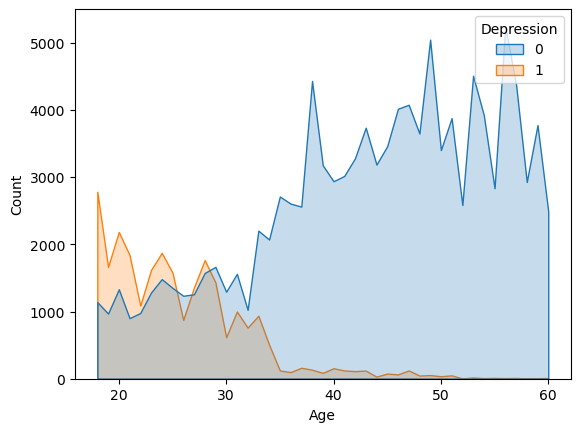

In [20]:
# histogram by age, two curves depression/no
sns.histplot(data=data, x="Age", hue="Depression", element="poly", bins=np.linspace(17.5, 60.5, 44))

In [39]:
# dietary habits vs depression
data["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [41]:
# remove unwanted value rows
for i in data.index:
  if data.loc[i, "Dietary Habits"] not in ['Healthy', 'Unhealthy', 'Moderate']:
    data.drop(i, inplace=True)

<AxesSubplot:xlabel='Dietary Habits', ylabel='Count'>

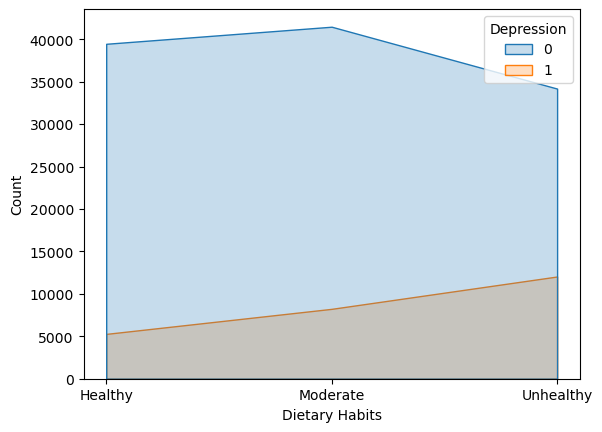

In [47]:
# sorting works by coincidence
sns.histplot(data=data.sort_values('Dietary Habits'), x="Dietary Habits", hue="Depression", element="poly")

<AxesSubplot:xlabel='Dietary Habits'>

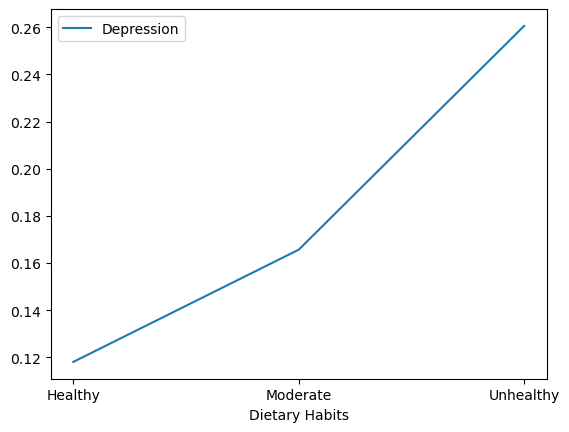

In [77]:
# fraction of depressive individuals
diet_depress = data[['Dietary Habits', "Depression"]].groupby(['Dietary Habits']).sum() / data[['Dietary Habits', "Depression"]].groupby(['Dietary Habits']).count()

sns.lineplot(data=diet_depress)

<AxesSubplot:xlabel='Financial Stress', ylabel='Count'>

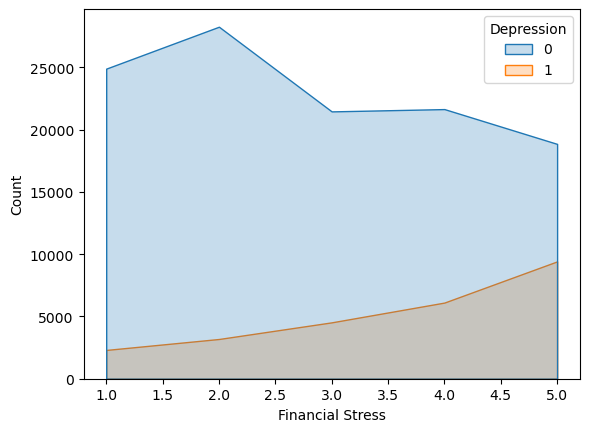

In [81]:
# financial stress vs depression
data["Financial Stress"].unique()
data.dropna(subset="Financial Stress", inplace=True)
sns.histplot(data=data, x="Financial Stress", hue="Depression", element="poly", bins=np.linspace(0.5, 5.5, 6))

<AxesSubplot:xlabel='Financial Stress'>

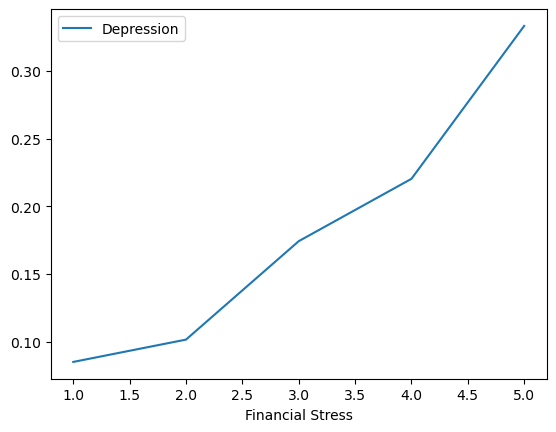

In [82]:
# fraction of depressive individuals
diet_depress = data[["Financial Stress", "Depression"]].groupby(["Financial Stress"]).sum() / data[["Financial Stress", "Depression"]].groupby(["Financial Stress"]).count()

sns.lineplot(data=diet_depress)

In [7]:
data.dropna(subset=['Name', "Profession", 'City', 'Profession', 'Sleep Duration', 'Degree'], inplace=True) # probably should just drop from all of the columns
# -> this drops a total of 36k rows, approx. 26% of the whole dataset; maybe some of these are still useable?

# Degree seems to have a bunch of invalid values -> drop extremely rare ones, assuming they are bogus
counts = data['Degree'].value_counts(normalize=True)
data = data.loc[data['Degree'].isin(counts[counts > 0.001].index), :]

# sleep duration too ('49 hours', 'Pune', ...) -> have to change multiple things here

# and profession -> some might be wrong, but hard to say ...
# and city -> some might be wrong, but hard to say ...
for i in data.index:
  if data.loc[i, "City"] in ['City', '3.0', 'MCA', 'Less than 5 Kalyan', 'M.Tech', 'MSc', 'M.Com', 'No', 'Researcher', 'ME']:
    data.drop(i, inplace=True)


# join job/study satisfaction and academic/work pressure (?) columns
pressure = np.empty(len(data))
satisfaction = np.empty(len(data))
for i, index in enumerate(data.index):
    if np.isnan(data.loc[index, "Study Satisfaction"]):
        satisfaction[i] = data.loc[index, "Job Satisfaction"]
    else:
        satisfaction[i] = data.loc[index, "Study Satisfaction"]
    if np.isnan(data.loc[index, "Academic Pressure"]):
        pressure[i] = data.loc[index, "Work Pressure"]
    else:
        pressure[i] = data.loc[index, "Academic Pressure"]

data['Pressure'] = pressure
data['Satisfaction'] = satisfaction
data = data.drop(columns=["Work Pressure", "Academic Pressure", 'Job Satisfaction', 'Study Satisfaction'])
data.dropna(subset=['Pressure', 'Satisfaction'], inplace=True)

# CGPA: most don't have a value here -> just drop the whole column
data = data.drop(columns=['CGPA'])

In [19]:
# sleep duration: translate the strings into numbers, dropping implausible ones
for i in data.index:
  if data.loc[i, "Sleep Duration"] in ['Sleep_Duration', 'Indore', 'Unhealthy', 'Pune', 'Work_Study_Hours', 'No', '45']:
    data.drop(i, inplace=True)

sleep_dict = {'Less than 5 hours': 5,
              'More than 8 hours': 8,
              '1-3 hours': 2,
              '1-6 hours': 3.5,
              '2-3 hours': 2.5,
              '3-4 hours': 3.5,
              '3-6 hours': 4.5,
              '4-5 hours': 4.5,
              '4-6 hours': 5,
              '5-6 hours': 5.5,
              '6-7 hours': 6.5,
              '6-8 hours': 7,
              '7-8 hours': 7.5,
              '8-9 hours': 8.5,
              '9-11 hours': 10,
              '9-5': 8,
              '9-5 hours': 8,
              '9-6 hours': 9,
              '10-6 hours': 8
             }

data['Sleep Duration'] = data['Sleep Duration'].replace(sleep_dict)
data = data[pd.to_numeric(data['Sleep Duration'], errors='coerce').notnull()] # remove other line

In [20]:
data['Sleep Duration'].value_counts()

5.0     38789
7.5     36969
8.0     32729
5.5     32142
3.5        16
6.5         8
4.5         8
2.5         5
7.0         4
8.5         2
10.0        2
9.0         1
2.0         1
Name: Sleep Duration, dtype: int64

<AxesSubplot:xlabel='Sleep Duration', ylabel='Count'>

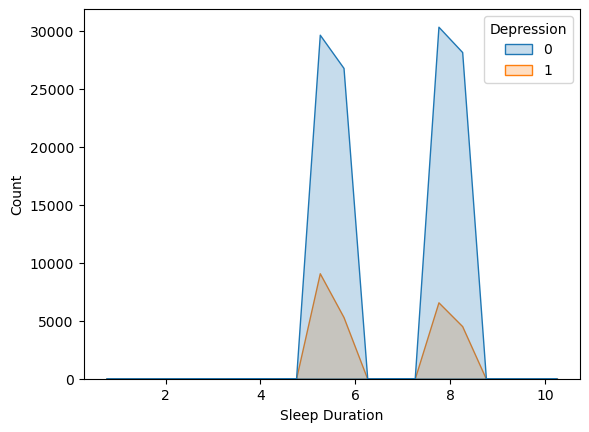

In [23]:
# sleep duration vs. depression
sns.histplot(data=data, x="Sleep Duration", hue="Depression", element="poly", bins=np.linspace(0.5, 10.5, 21))